# **Análise de retenção**


## **Descrição do problema**

#### Baseado nos dados da Pesquisa Etensiva do Desenvolvimento Educacional PEDE 2022, identificamos o termo "evasão" como a diferença entre o número de estudantes de uma dada idade em um ano, e o número de estudantes veteranos dessa mesma idade +1 ano no ano seguinte.

#### Segundo os elaboradores da pesquisa, os dados apresentados indicam que existe uma rotatividade na Associação, que se expressa por meio de uma taxa de evasão média de 28,5% entre 2020 e 2022. Abaixo, é possível ver o gráfico de frequência da evasão entre 2021 e 2022

## **Objetivo da Análise**

#### Fazer uma análise do perfil dos alunos que evadiram, entender características que potencialmente tem mais correlação com essa prática e identificar quais outros alunos podem evadir, para que a Passos Mágicos consiga direcionar ações mais específicas para reter por mais tempo esses alunos ao longo do tempo.



In [1]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data/raw/PEDE_PASSOS_DATASET_FIAP.csv', sep=';')

In [3]:
df.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)


## **ANÁLISE EXPLORATÓRIA**

#### A primeira forma de identificar os alunos que evadiram é entender quais features temos na base.

#### Verificamos que existem dois campos, "ponto_virada" que pode nos trazer essa informação, visto que existe durante os 3 anos de dados existentes.



### Identificando alunos que evadiram

In [4]:
indicacao_evasao = ['NOME', 'PONTO_VIRADA_2020', 'PONTO_VIRADA_2021', 'PONTO_VIRADA_2022']
df_evasao = df[indicacao_evasao]

df_evasao.head()

,NOME,PONTO_VIRADA_2020,PONTO_VIRADA_2021,PONTO_VIRADA_2022
0,ALUNO-1,Não,Não,NaN
1,ALUNO-2,NaN,NaN,Não
2,ALUNO-3,Não,Não,NaN
3,ALUNO-4,Não,NaN,Não
4,ALUNO-5,Não,Não,Não


In [5]:
# Verificando quais alunos evadiram
def verifica_evadidos(row):
    if pd.isna(row['PONTO_VIRADA_2022']):  # Se PONTO_VIRADA_2022 for NaN
        return True  # O aluno evadiu
    elif pd.isna(row['PONTO_VIRADA_2020']):  # Se PONTO_VIRADA_2020 for NaN
        return False  # O aluno não evadiu
    elif pd.isna(row['PONTO_VIRADA_2021']):  # Se PONTO_VIRADA_2021 for NaN
        return True  # O aluno evadiu
    else:
        return False  # O aluno não evadiu

In [6]:
df_evasao['EVADIU'] = df_evasao.apply(verifica_evadidos, axis=1)

df_evasao.head(20)

C:\Users\Pehls\AppData\Local\Temp\ipykernel_11964\3149641427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evasao['EVADIU'] = df_evasao.apply(verifica_evadidos, axis=1)


,NOME,PONTO_VIRADA_2020,PONTO_VIRADA_2021,PONTO_VIRADA_2022,EVADIU
0,ALUNO-1,Não,Não,NaN,True
1,ALUNO-2,NaN,NaN,Não,False
2,ALUNO-3,Não,Não,NaN,True
3,ALUNO-4,Não,NaN,Não,True
4,ALUNO-5,Não,Não,Não,False
5,ALUNO-6,NaN,NaN,Não,False
6,ALUNO-7,NaN,NaN,Não,False
7,ALUNO-8,Sim,Não,Não,False
8,ALUNO-9,NaN,NaN,Não,False
9,ALUNO-10,Não,NaN,NaN,True


In [7]:
# Função para identificar o último ano de ponto de virada antes de NaN
def ultimo_ano(row):
    if row['EVADIU']:  # Verifica se EVADIU é verdadeiro
        if row['PONTO_VIRADA_2020'] in ['Sim', 'Não'] and pd.isna(row['PONTO_VIRADA_2021']):
            return 2020
        elif row['PONTO_VIRADA_2021'] in ['Sim', 'Não'] and pd.isna(row['PONTO_VIRADA_2022']):
            return 2021
        elif row['PONTO_VIRADA_2022'] in ['Sim', 'Não']:
            return 2022
    return pd.NA

In [8]:
# Aplicar a função para cada linha do DataFrame
df_evasao['ULTIMO_ANO'] = df_evasao.apply(ultimo_ano, axis=1)

df_evasao.head(20)

C:\Users\Pehls\AppData\Local\Temp\ipykernel_11964\2470220789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evasao['ULTIMO_ANO'] = df_evasao.apply(ultimo_ano, axis=1)


,NOME,PONTO_VIRADA_2020,PONTO_VIRADA_2021,PONTO_VIRADA_2022,EVADIU,ULTIMO_ANO
0,ALUNO-1,Não,Não,NaN,True,2021
1,ALUNO-2,NaN,NaN,Não,False,<NA>
2,ALUNO-3,Não,Não,NaN,True,2021
3,ALUNO-4,Não,NaN,Não,True,2020
4,ALUNO-5,Não,Não,Não,False,<NA>
5,ALUNO-6,NaN,NaN,Não,False,<NA>
6,ALUNO-7,NaN,NaN,Não,False,<NA>
7,ALUNO-8,Sim,Não,Não,False,<NA>
8,ALUNO-9,NaN,NaN,Não,False,<NA>
9,ALUNO-10,Não,NaN,NaN,True,2020


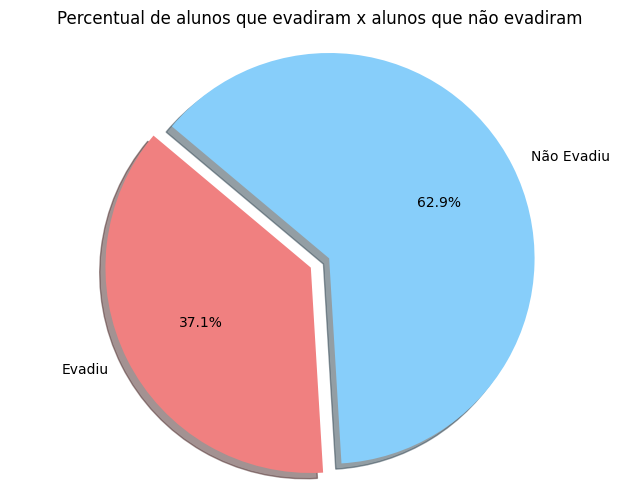

In [9]:
# Contando o número de alunos que evadiram e não evadiram
evadiu_count = df_evasao['EVADIU'].sum()
nao_evadiu_count = len(df_evasao) - evadiu_count

# Criando os rótulos e os valores para o gráfico de pizza
labels = ['Evadiu', 'Não Evadiu']
sizes = [evadiu_count, nao_evadiu_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Criando o gráfico de setores
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentual de alunos que evadiram x alunos que não evadiram')
plt.axis('equal')
plt.show()

### **Estudo sobre os alunos evadidos**

#### Agora que identificamos quais alunos evadiram, vamos agrupá-los e fazer uma análise exploratória

In [10]:
# Mesclar os DataFrames com base na coluna 'NOME'
df = df.merge(df_evasao[['NOME', 'EVADIU', 'ULTIMO_ANO']], on='NOME', how='left')

# Visualizar o DataFrame combinado
print(df)

     INSTITUICAO_ENSINO_ALUNO_2020        NOME IDADE_ALUNO_2020 ANOS_PM_2020  \
0                   Escola Pública     ALUNO-1               11            2   
1                              NaN     ALUNO-2              NaN          NaN   
2                   Escola Pública     ALUNO-3               12            2   
3                   Escola Pública     ALUNO-4               10            2   
4                   Escola Pública     ALUNO-5               10            1   
...                            ...         ...              ...          ...   
1344                           NaN  ALUNO-1345              NaN          NaN   
1345                           NaN  ALUNO-1346              NaN          NaN   
1346                Escola Pública  ALUNO-1347               17            1   
1347                Escola Pública  ALUNO-1348               13            2   
1348                           NaN  ALUNO-1349              NaN          NaN   

     FASE_TURMA_2020 PONTO_VIRADA_2020 

In [11]:
cols = ['INDE_2020',  'IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020',
         'INDE_2021', 'IAA_2021', 'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'IPV_2021', 'IAN_2021',
         'INDE_2022', 'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022', 'IPP_2022', 'IPV_2022', 'IAN_2022' 'CG_2022', 'CF_2022', 'CT_2022',]
df.columns

Index(['INSTITUICAO_ENSINO_ALUNO_2020', 'NOME', 'IDADE_ALUNO_2020',
       'ANOS_PM_2020', 'FASE_TURMA_2020', 'PONTO_VIRADA_2020', 'INDE_2020',
       'INDE_CONCEITO_2020', 'PEDRA_2020', 'DESTAQUE_IEG_2020',
       'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020', 'IAA_2020', 'IEG_2020',
       'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020', 'FASE_2021',
       'TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021',
       'SINALIZADOR_INGRESSANTE_2021', 'PEDRA_2021', 'INDE_2021', 'IAA_2021',
       'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'REC_EQUIPE_1_2021',
       'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021',
       'PONTO_VIRADA_2021', 'IPV_2021', 'IAN_2021', 'NIVEL_IDEAL_2021',
       'DEFASAGEM_2021', 'FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022',
       'BOLSISTA_2022', 'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022',
       'PEDRA_2022', 'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022',
       'DESTAQUE_IPV_2022', 'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022',
       

In [12]:
# removendo linha problematica
df = df.loc[~(df['INDE_2020'] == 'D980')]

In [13]:
df.loc[(df['INDE_2021'] == '#NULO!'),['INDE_2021']] = np.nan

In [14]:
for col in cols:
    print('-='*20)
    print(col)
    df.loc[:, [col]] = df[col].astype(float)
    print(df.groupby('EVADIU')[col].describe())

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
INDE_2020
        count  unique       top  freq
EVADIU                               
False   314.0   314.0  8.077085   1.0
True    413.0   413.0  7.883752   1.0
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
IAA_2020
        count  unique      top  freq
EVADIU                              
False   314.0    35.0  9.00002  71.0
True    413.0    35.0  9.00002  52.0
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
IEG_2020
        count  unique   top  freq
EVADIU                           
False   314.0    58.0  10.0  41.0
True    413.0    84.0  10.0  46.0
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
IPS_2020
        count  unique  top   freq
EVADIU                           
False   314.0    13.0  7.5  166.0
True    413.0    13.0  7.5  230.0
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
IDA_2020
        count  unique   top  freq
EVADIU                           
False   314.0    44.0  10.0  44.0
True    413.0    67.0   0.0  59.0
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


## ❗❗ **EM CONSTRUÇÃO** ❗❗

#### Próximos passos mapeados:

* Entender quais são as features existentes para cada ano (utilizar mesmos dados para fazer as análises de cada ano);

* Verificar a diferença de Evadiu // Último Ano;

* Análise descritiva dos dados

* Identificar a correlação da feature EVADIU com as demais em estudo;

In [15]:
df[cols + ['EVADIU']]

,INDE_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,INDE_2021,IAA_2021,...,CF_2022,CT_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,IPP_2022,IPV_2022,IAN_2022,EVADIU
0,7.883752,8.50002,8.7,7.5,7.0,5.9375,7.75,10.0,7.319,7.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66.0,6.0,10.00002,7.581705,7.500,8.816667,5.625000,7.916665,5.0,False
2,7.85639,7.91667,8.9,7.5,5.5,8.125,8.111113,10.0,7.021,7.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,5.076252,8.00002,4.1,6.875,0.0,7.1875,7.75,5.0,NaN,NaN,...,69.0,3.0,10.00002,8.071429,7.500,5.083333,6.250000,8.055553,5.0,True
4,8.077085,7.50002,8.0,7.5,7.5,8.4375,8.166665,10.0,7.399,7.4,...,61.0,12.0,6.41668,8.557505,7.500,7.083333,6.458333,7.833337,5.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.606,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.0,2.0,9.00002,9.031839,7.500,9.000000,5.625000,9.083340,5.0,False
1346,7.158543,9.16668,8.1,6.875,4.666667,7.34375,6.333335,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1347,7.842224,7.91667,7.1,6.875,6.333333,8.541667,9.11112,10.0,7.422,7.5,...,51.0,6.0,8.33334,9.178030,5.625,5.900000,6.718750,5.833328,5.0,False


## análise das variáveis envolvidas
vamos executar uma regressão lasso para identificar quais features tem uma importância/coeficiente/beta com relação á evasão;
para tal, vamos plotar a correlação, remover a multicolinearidade com o Variance Inflaction Factor, e executar a regressão:

In [16]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectPercentile
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

def calculate_lr(X, y):
        """
        Function to calculate r2_score through linear regression.
        Parameters: X = predictor variables
                    y = Target variable
        This function returns VIF metric (Variance inflation factor) through 1 / (1 - r2_score(y, y_predict))
        """
        reg = linear_model.LinearRegression()

        reg.fit(X.values.reshape(-1, 1), y)

        y_predict = reg.predict(X.values.reshape(-1, 1))

        r2 = r2_score(y, y_predict)
        var_inflation_factor = 1 / (1 - r2)

        return var_inflation_factor

def _calculate_vif_(X, y,quartil: float = 0.75):
        """
        Function to calculate VIF for all predictor variables. At the end of the function, all variables that present VIF greater than Q3 are excluded.
        Parameters: X = predictor variables
                    y = Target variable
        This function create a dataframe (X_lasso) with the predictor variables with VIF less than Q3.
        """
        feature_list = X.columns
        vif_df = pd.Series(
            [calculate_lr(X[feature], y) for feature in feature_list],
            index=feature_list,
        ).to_frame()

        vif_df = vif_df.sort_values(by=0, ascending=False).rename(columns={0: "VIF"})

        Q3 = np.quantile(vif_df["VIF"], quartil)

        vif_df = vif_df[vif_df["VIF"] > Q3]

        col_to_drop = list(vif_df.index)

        for i in col_to_drop:
            X_lasso = X.drop(columns=i)
        return X_lasso, y

def lassoRegression(X, y):
    """
    Linear Model trained with L1 prior as regularizer (aka the Lasso)
    """
    # X_lasso, y = _calculate_vif_(X, y)
    X_lasso_train, y_lasso_train = X, y
    feature_list = X.columns

    # X_lasso_train, X_lasso_test, y_lasso_train, y_lasso_test = train_test_split(
    #     X_lasso, y, test_size=0.2, random_state=42, shuffle=False
    # )

    # numerical pipeline:
    numeric_transformer = Pipeline(
        steps=[
            (
                "converter",
                FunctionTransformer(lambda df: df.apply(pd.to_numeric, errors="coerce")),
            ),
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler()),
        ]
    )

    preprocessor = ColumnTransformer(
        transformers=[
            (
                "num",
                numeric_transformer,
                np.intersect1d(feature_list, X.columns).tolist(),
            )
        ]
    )

    pipeline = Pipeline(
        [("preprocessor", preprocessor), ("model", Lasso(max_iter=10000, tol=0.001))]
    )

    # search = GridSearchCV(
    #     pipeline, {"model__alpha": np.arange(0.1, 20, 0.5)}, cv=TimeSeriesSplit(n_splits = 2), scoring="r2", verbose=1
    # )

    # search.fit(X_lasso_train, y_lasso_train)
    pipeline.fit(X_lasso_train, y_lasso_train)

    # Pegamos o absoluto dos coeficientes das features
    abs_lasso_coef = np.abs(pipeline.named_steps['model'].coef_) # search.best_estimator_.named_steps com gridsearch
    _features = pipeline.named_steps["preprocessor"].transformers_[0][2]
    lasso_accepted = np.array(_features)[abs_lasso_coef > 0]

    return pd.DataFrame([_features, abs_lasso_coef], index=['Feature', "Beta"]).T

In [17]:
df = df[cols + ['EVADIU']]

In [18]:
fig = px.imshow(df.corr(), text_auto=True, aspect='auto',)
fig.update_layout(
     height=1800
    ,width=1800
)
fig.show()

In [19]:
_input_missings = SimpleImputer(strategy="median")
df.loc[:, cols] = pd.DataFrame(_input_missings.fit_transform(df.loc[:, cols]), columns=cols)
df = df.dropna(axis=0)

In [20]:
lassoRegression(df[cols], df['EVADIU'])

,Feature,Beta
0,CF_2022,0.0
1,CG_2022,0.0
2,CT_2022,0.0
3,DEFASAGEM_2021,0.0
4,IAA_2020,0.0
5,IAA_2021,0.0
6,IAA_2022,0.0
7,IAN_2020,0.0
8,IAN_2021,0.0
9,IAN_2022,0.0


# BorutaShap´
vamos tentar os shapley values:


In [21]:

from BorutaShap import BorutaShap

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
       df[cols], df['EVADIU'], test_size=0.2, random_state=42, shuffle=False
    )

rf_estimator = GradientBoostingClassifier(random_state=42)

rf_feature_selection = BorutaShap(
    model=rf_estimator, importance_measure="shap", classification=False, pvalue=0.1
)

rf_feature_selection.fit(
    X=X_train,
    y=y_train,
    n_trials=50,
    sample=False,
    train_or_test="train",
    normalize=True,
    verbose=False,
)

boruta_accepted = rf_feature_selection.accepted

  0%|          | 0/50 [00:00<?, ?it/s]

In [23]:
boruta_accepted

['IPS_2022',
 'IPP_2022',
 'INDE_2020',
 'IPV_2022',
 'IAA_2021',
 'IEG_2020',
 'CF_2022',
 'CG_2022',
 'IAA_2022',
 'IAA_2020',
 'IDA_2022',
 'IEG_2022',
 'IDA_2020',
 'INDE_2022',
 'INDE_2021',
 'CT_2022']

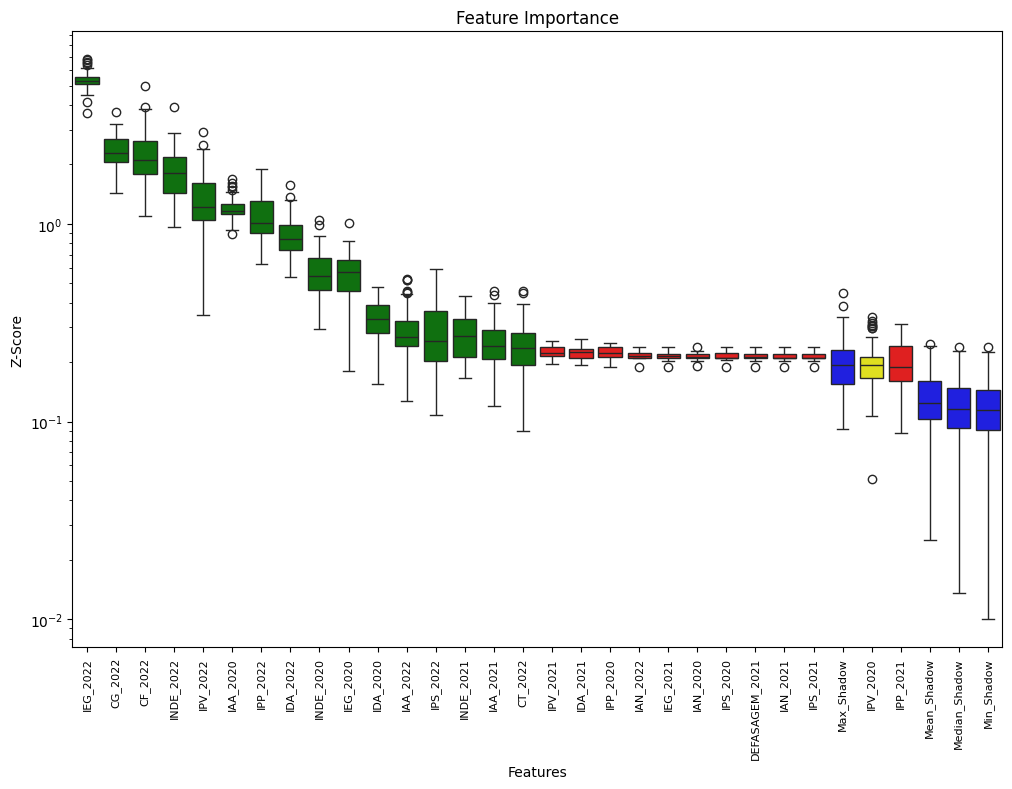

In [24]:
rf_feature_selection.plot(which_features='all')

In [25]:
# https://github.com/Ekeany/Boruta-Shap/blob/master/Examples/Classification.ipynb
rf_feature_selection.TentativeRoughFix()

1 tentative features are now accepted: ['IPV_2020']
0 tentative features are now rejected: []


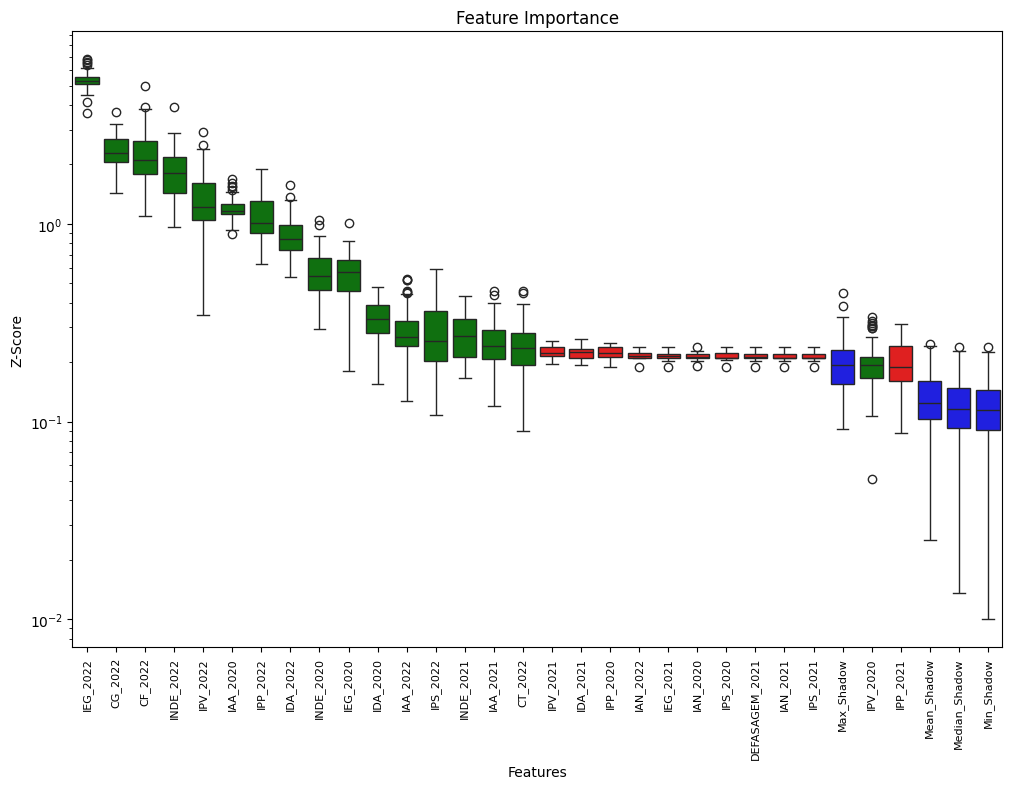

In [26]:
rf_feature_selection.plot(which_features='all')